Loaded image of shape: 4672×7008


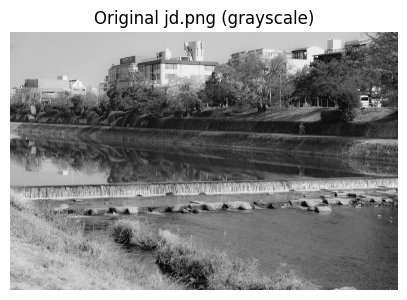

In [2]:
# Cell 1 — 从本地路径读取图像并转换为灰度矩阵

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 注意：用原始字符串或双反斜杠
img_path = r"E:\项目\深度学习实验\deeplearning-not\jd.png"

# 打开、转灰度、转换为 NumPy 数组（float）
img = Image.open(img_path).convert("L")
img_array = np.array(img, dtype=float) / 255.0   # 归一化到 [0,1]

H, W = img_array.shape
print(f"Loaded image of shape: {H}×{W}")

# 可视化原图
plt.figure(figsize=(5,5))
plt.imshow(img_array, cmap='gray')
plt.title("Original jd.png (grayscale)")
plt.axis('off')
plt.show()


In [3]:
# Cell 2 — SVD 分解
# full_matrices=False 表示 U:[H×min], S:[min], Vt:[min×W]
U, S, Vt = np.linalg.svd(img_array, full_matrices=False)
print("Top 10 singular values:", S[:10])


Top 10 singular values: [2738.86525946  382.43753671  295.36208992  270.1015518   191.64849159
  165.0679764   151.60430021  128.37126245  117.75341342  112.14852527]


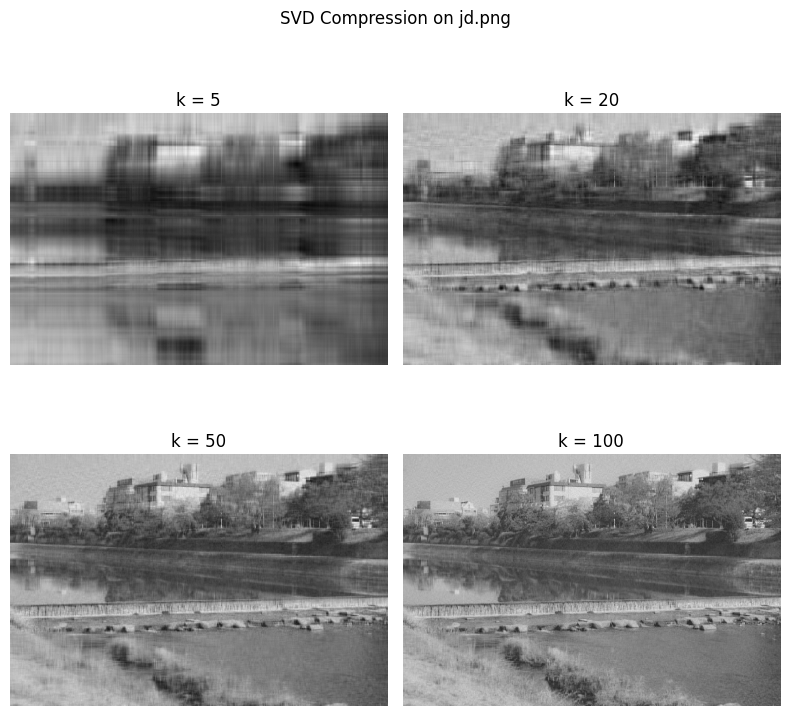

In [4]:
# Cell 3 — 用前 k 个奇异值重构并展示
ks = [5, 20, 50, 100]   # 保留奇异值数目
plt.figure(figsize=(8,8))

for i, k in enumerate(ks, 1):
    # 重构：U[:, :k] @ diag(S[:k]) @ Vt[:k, :]
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vtk = Vt[:k, :]
    img_k = Uk @ Sk @ Vtk

    plt.subplot(2,2,i)
    plt.imshow(img_k, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("SVD Compression on jd.png")
plt.tight_layout()
plt.show()


In [5]:
# Cell 4 — 压缩率 & 相对误差
orig_size = H * W
for k in ks:
    # SVD 存储成本：k*(H + W + 1)
    cost = k*(H + W + 1)
    ratio = cost / orig_size

    # 重构误差 ‖A - A_k‖_F / ‖A‖_F
    Uk = U[:, :k]; Sk = np.diag(S[:k]); Vtk = Vt[:k, :]
    rec = Uk @ Sk @ Vtk
    err = np.linalg.norm(img_array - rec) / np.linalg.norm(img_array)

    print(f"k={k:3d}  compression_ratio={ratio:.4f}  relative_error={err:.4f}")


k=  5  compression_ratio=0.0018  relative_error=0.2170
k= 20  compression_ratio=0.0071  relative_error=0.1635
k= 50  compression_ratio=0.0178  relative_error=0.1347
k=100  compression_ratio=0.0357  relative_error=0.1137
